### This program uses Artificial recurrent neural network SimpleRNN to predict closing stock price

In [33]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [34]:
ticker = 'AAPL'

In [35]:
#getting the stock quote
df = web.DataReader(ticker,data_source='yahoo',start='2021-10-25',end='2022-10-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,147.566940
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,148.242020
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,147.775436
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,151.468567
2021-10-29,149.940002,146.410004,147.220001,149.800003,124953200.0,148.718567
...,...,...,...,...,...,...
2022-10-18,146.699997,140.610001,145.490005,143.750000,99136600.0,143.511932
2022-10-19,144.949997,141.500000,141.690002,143.860001,61758300.0,143.621750
2022-10-20,145.889999,142.649994,143.020004,143.389999,64522000.0,143.152527


In [36]:
#Getting the number of rows and columns in the dataset
df.shape

(252, 6)

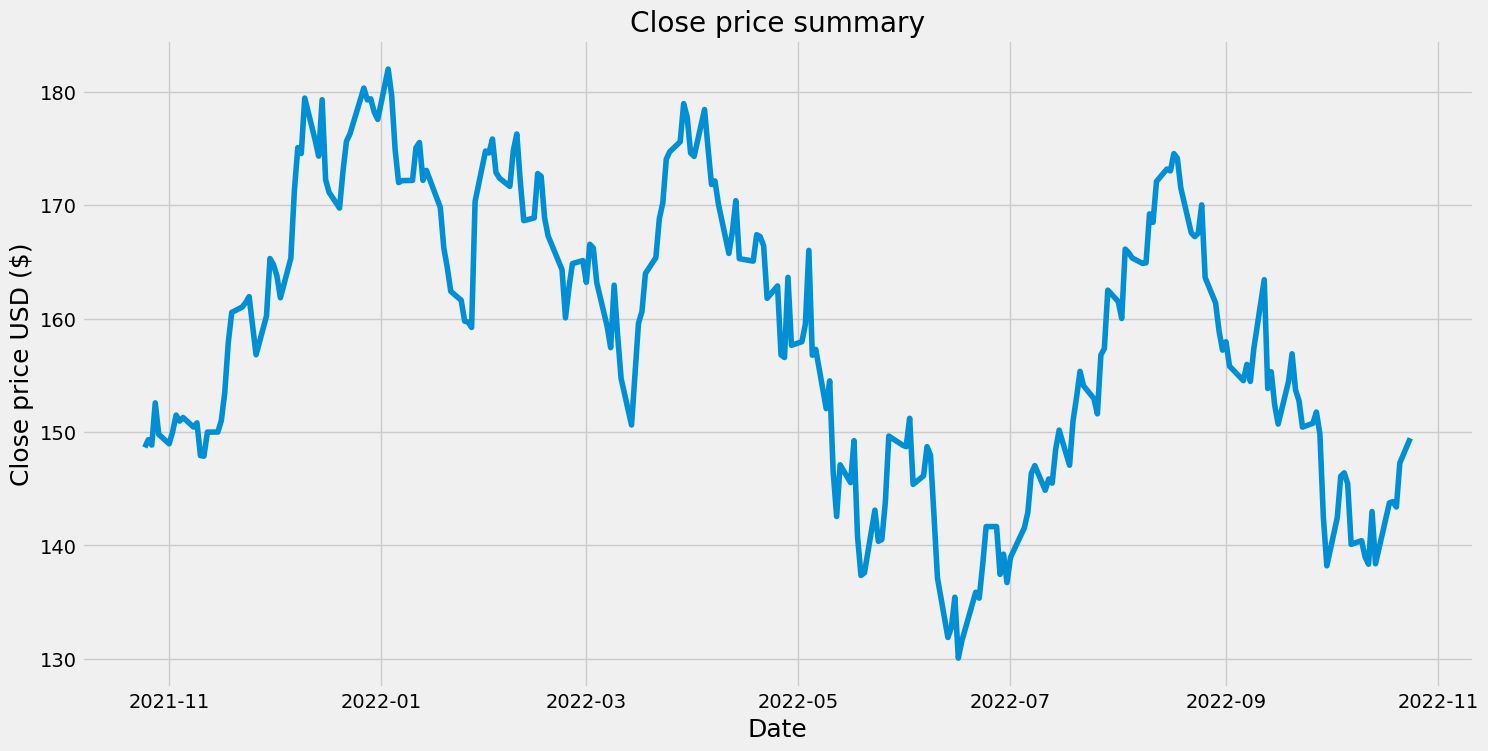

In [37]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [38]:
#create a new dataframe with just the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

202

In [39]:
#Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.35765164],
       [0.37074131],
       [0.36169412],
       [0.43330146],
       [0.37998088],
       [0.36381155],
       [0.38421574],
       [0.41251221],
       [0.40231011],
       [0.40846973],
       [0.39230041],
       [0.39942255],
       [0.34379214],
       [0.34282962],
       [0.38363829],
       [0.38383068],
       [0.40307996],
       [0.45101077],
       [0.53532241],
       [0.58691063],
       [0.59595782],
       [0.60346502],
       [0.61366712],
       [0.51491822],
       [0.5809434 ],
       [0.67834471],
       [0.66814261],
       [0.64870065],
       [0.61174207],
       [0.67872978],
       [0.79153027],
       [0.86660264],
       [0.85659293],
       [0.95072189],
       [0.87930723],
       [0.85216568],
       [0.94783462],
       [0.81231953],
       [0.79076043],
       [0.76400394],
       [0.82637171],
       [0.87738218],
       [0.88970171],
       [0.96766135],
       [0.94764194],
       [0.9493746 ],
       [0.92666029],
       [0.914

In [40]:
#Create the training dataset
#create a scaled dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([0.35765164, 0.37074131, 0.36169412, 0.43330146, 0.37998088,
       0.36381155, 0.38421574, 0.41251221, 0.40231011, 0.40846973,
       0.39230041, 0.39942255, 0.34379214, 0.34282962, 0.38363829,
       0.38383068, 0.40307996, 0.45101077, 0.53532241, 0.58691063,
       0.59595782, 0.60346502, 0.61366712, 0.51491822, 0.5809434 ,
       0.67834471, 0.66814261, 0.64870065, 0.61174207, 0.67872978,
       0.79153027, 0.86660264, 0.85659293, 0.95072189, 0.87930723,
       0.85216568, 0.94783462, 0.81231953, 0.79076043, 0.76400394,
       0.82637171, 0.87738218, 0.88970171, 0.96766135, 0.94764194,
       0.9493746 , 0.92666029, 0.91453345, 1.        , 0.95553421,
       0.86352268, 0.80731482, 0.81058716, 0.81097223, 0.86660264,
       0.87526475, 0.81097223, 0.82791169, 0.76496646, 0.6962464 ])]
[0.6631376125500976]



In [41]:
train_data

array([[0.35765164],
       [0.37074131],
       [0.36169412],
       [0.43330146],
       [0.37998088],
       [0.36381155],
       [0.38421574],
       [0.41251221],
       [0.40231011],
       [0.40846973],
       [0.39230041],
       [0.39942255],
       [0.34379214],
       [0.34282962],
       [0.38363829],
       [0.38383068],
       [0.40307996],
       [0.45101077],
       [0.53532241],
       [0.58691063],
       [0.59595782],
       [0.60346502],
       [0.61366712],
       [0.51491822],
       [0.5809434 ],
       [0.67834471],
       [0.66814261],
       [0.64870065],
       [0.61174207],
       [0.67872978],
       [0.79153027],
       [0.86660264],
       [0.85659293],
       [0.95072189],
       [0.87930723],
       [0.85216568],
       [0.94783462],
       [0.81231953],
       [0.79076043],
       [0.76400394],
       [0.82637171],
       [0.87738218],
       [0.88970171],
       [0.96766135],
       [0.94764194],
       [0.9493746 ],
       [0.92666029],
       [0.914

In [42]:
#Convert the X_train and y_train to numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [43]:
X_train.shape

(142, 60)

### Building the model

In [44]:
model = Sequential()
model.add(SimpleRNN(2, input_shape=(X_train.shape[1],1)))
model.add(Dense(50))
model.add(Dense(1, activation="sigmoid"))

In [45]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error', metrics=["acc"])

In [46]:
model.fit(X_train,y_train,batch_size=1,epochs=4)

Epoch 1/4
142/142 [==============================] - 1s 4ms/step - loss: 0.0389 - acc: 0.0070
Epoch 2/4
142/142 [==============================] - 0s 3ms/step - loss: 0.0168 - acc: 0.0070
Epoch 3/4
142/142 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0070
Epoch 4/4
142/142 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0070


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [48]:
#Creating the testing dataset
#Create a new array containing scaled value from index 2117 to 2721
test_data = scaled_data[training_data_len-60:,:]
#create the dataset X_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [49]:
#CONVERT THE DATA INTO A np.array
X_test = np.array(X_test)

In [50]:
X_test.shape

(50, 60)

In [51]:
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(50, 60, 1)

In [52]:
#Getting the model predicted price value
predictions = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [53]:
predictions.shape

(50, 1)

In [54]:
predictions=scalar.inverse_transform(predictions)

In [55]:
predictions.shape

(50, 1)

In [56]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_gamma_deviance,mean_poisson_deviance,explained_variance_score
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
mgd = mean_gamma_deviance(y_test,predictions)
mpd = mean_poisson_deviance(y_test,predictions)
evs = explained_variance_score(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)

print('RMSE:',rmse)
print('MSE:',mse)
print('R2:',r2)
print('MGD:',mgd)
print('MPD:',mpd)
print('EVS:',evs)
print('MAE:',mae)

RMSE: 0.1711181640625
MSE: 14.236717684799805
R2: 0.8700823636827921
MGD: 0.0006013918323880052
MPD: 0.09232210784652466
EVS: 0.8703495723012047
MAE: 3.2306402587890624


/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_73798/2628329274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


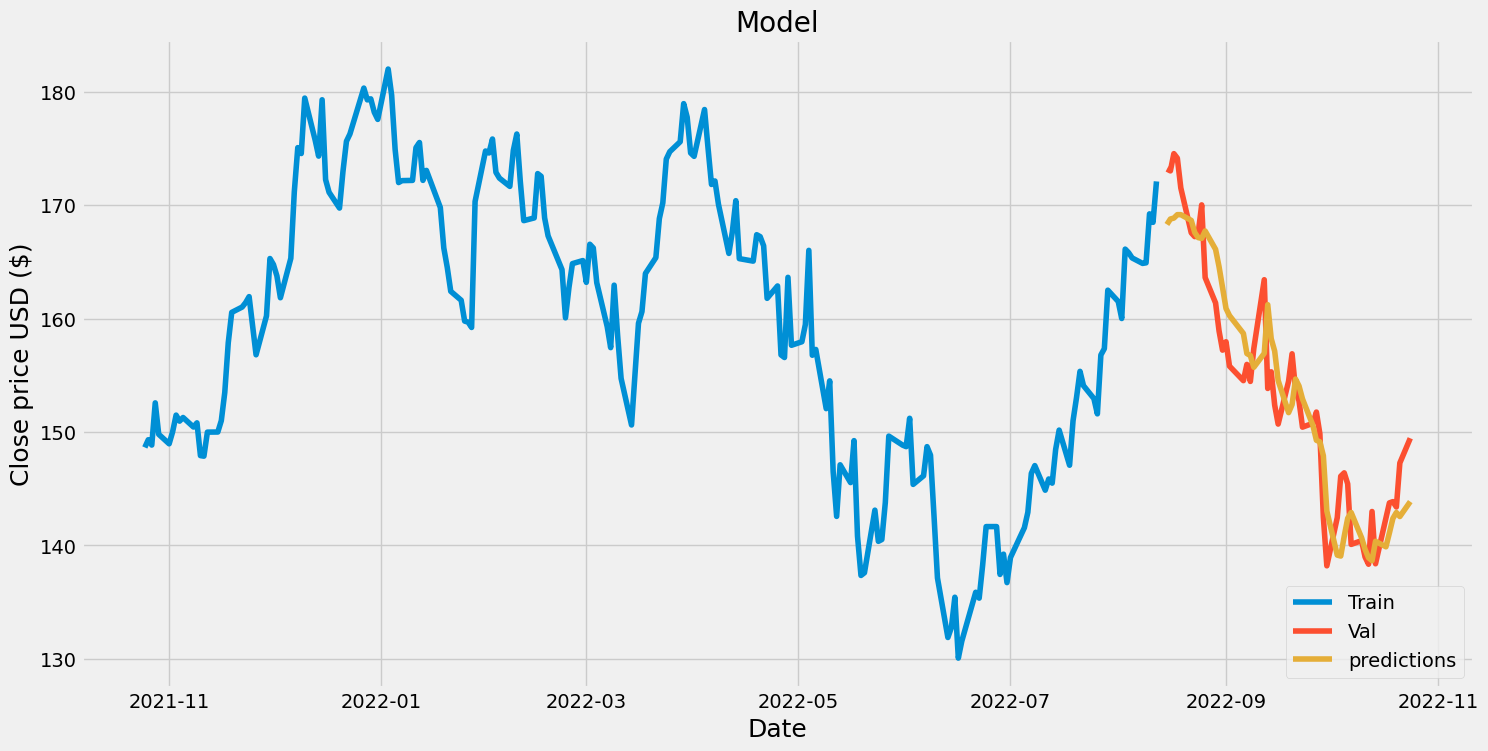

In [57]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [58]:
#Show the valid and predicted price
valid

,Close,predictions
Date,,
2022-08-15,173.190002,168.302582
2022-08-16,173.029999,168.781723
2022-08-17,174.550003,168.867096
2022-08-18,174.149994,169.168442
2022-08-19,171.520004,169.167465
2022-08-22,167.570007,168.662048
2022-08-23,167.229996,167.597366
2022-08-24,167.529999,167.143341
2022-08-25,170.029999,167.078033


In [59]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2022-12-07


In [60]:
#Get the quote 
Stock_quote = web.DataReader(ticker,data_source='yahoo',start='2020-01-01',end=today)
#Create a new dataframe
new_df = Stock_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 17ms/step
[[139.97267]]


In [61]:
Stock_quote2 = web.DataReader(ticker,data_source='yahoo',start='11-04-22',end='11-04-22')
print(Stock_quote2['Close'])

Date
2022-11-04    138.380005
Name: Close, dtype: float64


In [62]:
Price_difference = pred_price[0]-Stock_quote2['Close']
percent_change=Price_difference[0]/Stock_quote2['Close'][0]
print('Based on this analysis, there is a price difference of ${:.2f} from the predicted cost to the actual cost with % {:.2f} difference.'.format(Price_difference[0],percent_change))

Based on this analysis, there is a price difference of $1.59 from the predicted cost to the actual cost with % 0.01 difference.
